<a href="https://colab.research.google.com/github/estradajhonatandavid/Maestria-AI./blob/main/Taller_2_An%C3%A1lisis_Univariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANÁLISIS DE PROCEDIMIENTOS MEDICOS REALIZADOS EN EL PAÍS CON LA BASE DE DATOS PÚBLCIA RIPS

El Ministerio de Salud y Protección social tiene una plataforma tecnologíca llamda SISPRO donde se integra, gestiona y consolida la información del sector salud y protección social.
El objetivo de SISPRO es proporcionar datos precisos y actualizados para la toma de decisiones, la formulación de políticas públicas y el monitoreo del sistema de salud en Colombia.
Dentro de SISPRO hay un componenque llamado RIPS (Registros Individuales de Prestación de Servicios de Salud) es un sistema donde se recolecta información detallada sobre cada uno de los servicios de salud que se prestan a los usuarios, como consultas médicas, procedimientos, hospitalizaciones, etc. Cada vez que un prestador de servicios de salud (hospital, clínica, etc.) atiende a un paciente, se genera un registro en el RIPS con todos los datos relevantes de esa atención.

La información que se usará es información de RIPS filtrada por algunos procedimientos especificos.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


------------------------------------------------
CARGUE DE INFORMACIÓN Y ENTENDIMIENTO DE LOS DATOS

In [11]:
#Se carga la muestra de la base de datos de RIPS

import pandas as pd

file_path = '/content/drive/My Drive/Maestria AI/SISPRO.xlsx'
# Se carga el archivo usando pandas
df = pd.read_excel(file_path, engine='openpyxl')
#Revisamos el tamaño del Data Frame
df.shape

(695987, 10)

In [12]:
#Revisión de nombre de Columnas
print(df.columns)

Index(['Anno', 'Mes', 'Departamento', 'Municipio', 'Administradora',
       'Prestador', 'Procedimiento CUPS', 'Número de Atenciones',
       'Número de Personas Atendidas', 'Conteo de Prestadores'],
      dtype='object')


In [13]:
#Revisión del tipo de datos
print(df.dtypes)

Anno                             int64
Mes                             object
Departamento                    object
Municipio                       object
Administradora                  object
Prestador                       object
Procedimiento CUPS              object
Número de Atenciones             int64
Número de Personas Atendidas     int64
Conteo de Prestadores            int64
dtype: object


In [14]:
print(df.head())

   Anno    Mes    Departamento         Municipio  \
0  2021  Enero  05 - Antioquia  05001 - Medellín   
1  2021  Enero  05 - Antioquia  05001 - Medellín   
2  2021  Enero  05 - Antioquia  05001 - Medellín   
3  2021  Enero  05 - Antioquia  05001 - Medellín   
4  2021  Enero  05 - Antioquia  05001 - Medellín   

                                     Administradora  \
0  05000 - DIRECCION SECCIONAL DE SALUD  DE ANTIOQU   
1  05000 - DIRECCION SECCIONAL DE SALUD  DE ANTIOQU   
2  05000 - DIRECCION SECCIONAL DE SALUD  DE ANTIOQU   
3  05000 - DIRECCION SECCIONAL DE SALUD  DE ANTIOQU   
4  05000 - DIRECCION SECCIONAL DE SALUD  DE ANTIOQU   

                                           Prestador  \
0  050010214401 - HOSPITAL GENERAL DE MEDELLÍN LU...   
1  050010214401 - HOSPITAL GENERAL DE MEDELLÍN LU...   
2  050010214401 - HOSPITAL GENERAL DE MEDELLÍN LU...   
3  050010217501 - FUNDACION HOSPITALARIA SAN VICE...   
4               050010420701 - RTS SUCURSAL MEDELLIN   

                   

In [15]:
print(df['Mes'].unique())

['Enero' 'Febrero' 'Marzo' 'Abril' 'Mayo' 'Junio' 'Julio' 'Agosto'
 'Septiembre' 'Octubre' 'Noviembre' 'Diciembre']


--------------------------------------------
AJUSTE DE FORMATOS

In [16]:
#Convierto el campo Mes a número para facilitar ordenamientos
meses = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6,
    'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}
df['Mes'] = df['Mes'].map(meses)

In [17]:
print(df['Mes'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [19]:
#Veo las primeras filas del DataFrame
print(df.head(1))

   Anno  Mes    Departamento         Municipio  \
0  2021    1  05 - Antioquia  05001 - Medellín   

                                     Administradora  \
0  05000 - DIRECCION SECCIONAL DE SALUD  DE ANTIOQU   

                                           Prestador  \
0  050010214401 - HOSPITAL GENERAL DE MEDELLÍN LU...   

                                  Procedimiento CUPS  Número de Atenciones  \
0  441302 - ESOFAGOGASTRODUODENOSCOPIA [EGD] CON ...                     1   

   Número de Personas Atendidas  Conteo de Prestadores  
0                             1                      1  


-----------------------------------------------------------
IDENTIFICACIÓN DE VALORES NULOS

In [20]:
#identificar Valores nulos
print(df['Mes'].unique())
valores_nulos = df.isnull().sum()
print(valores_nulos)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
Anno                            0
Mes                             0
Departamento                    0
Municipio                       0
Administradora                  0
Prestador                       0
Procedimiento CUPS              0
Número de Atenciones            0
Número de Personas Atendidas    0
Conteo de Prestadores           0
dtype: int64


In [22]:
# Ver los valores únicos de cada columna
print(df['Anno'].unique())

[2021 2022 2023 2024]


In [23]:
print(df['Departamento'].unique())

['05 - Antioquia' '08 - Atlántico' '-1 - NO DEFINIDO' '11 - Bogotá, D.C.'
 '13 - Bolívar' '15 - Boyacá' '17 - Caldas' '18 - Caquetá' '19 - Cauca'
 '20 - Cesar' '23 - Córdoba' '25 - Cundinamarca' '27 - Chocó' '41 - Huila'
 '44 - La Guajira' '47 - Magdalena' '50 - Meta' '52 - Nariño'
 '54 - Norte de Santander' '63 - Quindio' '66 - Risaralda'
 '68 - Santander' '70 - Sucre' '73 - Tolima' '76 - Valle del Cauca'
 '81 - Arauca' '85 - Casanare' '86 - Putumayo'
 '88 - Archipiélago de San Andrés, Providencia y Santa Catalina'
 '94 - Guainía' '95 - Guaviare' '97 - Vaupés' '99 - Vichada'
 '91 - Amazonas']


In [24]:
print(df['Administradora'].unique())

['05000 - DIRECCION SECCIONAL DE SALUD  DE ANTIOQU'
 '14-11 - SURAMERICANA DE SEGUROS DE VIDA S.A.' 'CCF102 - COMFACHOCO'
 'EAS016 - EPM' 'EAS027 - FERROCARRILES NALES' 'EMP017 - EMP COLMENA S.A'
 'EMP028 - SALUD COOMEVA  MEDICINA PREPAGADA S. A.'
 'EMP029 - COLPATRIA MEDICINA PREPAGADA S.A.' 'EPS002 - SALUD TOTAL'
 'EPS005 - SANITAS' 'EPS010 - EPS SURA' 'EPS016 - COOMEVA'
 'EPS037 - NUEVA EPS' 'EPS040 - SAVIA SALUD EPS'
 'EPS044 - MEDIMAS Contributivo' 'EPSS16 - COOMEVA EPS  SA'
 'EPSS40 - Alianza Medellin -savia Salud' 'ESS024 - COOSALUD E.S.S.'
 'RES008 - UNISALUD' 'ESS091 -  ECOOPSOS' 'EPS012 - COMFENALCO VALLE'
 'EPSS41 - NUEVA EPS SA' '14-4 - COLPATRIA' 'CCF055 - CAJACOPI'
 'CCFC55 - CAJACOPI ATLANTICO - CCF' 'EPS008 - COMPENSAR'
 'EPS017 - FAMISANAR' 'EPS048 - MUTUAL SER' 'EPSS17 - EPS  FAMISANAR LTDA'
 'ESS076 - AMBUQ' 'ESS133 - COMPARTA' 'ESS207 - MUTUAL SER'
 'ESSC07 - ASOCIACION MUTUAL SER EMPRESA SOLIDARIA'
 'EPSS45 - MEDIMAS Subsidiado'
 '08000 - DIRECCION SECCIONAL DE SAL

In [25]:
print(df['Prestador'].unique())

['050010214401 - HOSPITAL GENERAL DE MEDELLÍN LUZ CASTRO DE GUTIERREZ, EMPRESA SOCIAL DEL ESTADO'
 '050010217501 - FUNDACION HOSPITALARIA SAN VICENTE DE PAUL'
 '050010420701 - RTS SUCURSAL MEDELLIN' ...
 '050010434704 - COOPERATIVA ANTIOQUEÑA DE SALUD SEDE ARGENTINA'
 '050010909920 - PROMEDAN IPS PERÚ'
 '545180301301 - CENTRO DE ESPECIALIDADES MEDICAS DE PAMPLONA S.A.S']


-------------------------------------------------------------
IDENTIFICACIÓN DE VALORES ASIGNADOS A DEPARTAMENTO NO DEFINIDO

In [26]:
#Para ver cuantas atenciones quedan en el apartamento No Definido
atenciones_por_departamento = df.groupby('Departamento')['Número de Atenciones'].sum()
print(atenciones_por_departamento)

Departamento
-1 - NO DEFINIDO                                                  28693
05 - Antioquia                                                   420770
08 - Atlántico                                                    95677
11 - Bogotá, D.C.                                                434044
13 - Bolívar                                                     105764
15 - Boyacá                                                       70066
17 - Caldas                                                       71158
18 - Caquetá                                                      27285
19 - Cauca                                                        62135
20 - Cesar                                                        47756
23 - Córdoba                                                      63012
25 - Cundinamarca                                                136227
27 - Chocó                                                        70443
41 - Huila                                         

In [29]:
total_atenciones = atenciones_por_departamento.sum()
print(total_atenciones)

2737052


In [38]:
#Ver que porcentaje de atenciones representa el Departamento NO_DEFINIDO
atenciones_no_definido = df[df['Departamento'].str.contains("-1 - NO DEFINIDO")]['Número de Atenciones'].sum()
porcentaje_no_definido = (atenciones_no_definido / total_atenciones)*100
print(porcentaje_no_definido)

1.048317679021078


In [41]:
#Ver los estadístivos para la columna que vamos a usar
print(df['Número de Atenciones'].describe())

count    695987.000000
mean          3.932619
std          32.051770
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max       19684.000000
Name: Número de Atenciones, dtype: float64



---------------------------------------------------
IDENTIFICACIÓN DE DATOS ATÍPICOS


El conteo de filas no nulos es coherente, el promedio también dado que es el número de atenciones por combinación de Anno, Mes, Departamento, Municipio, Administradora , Prestador y Procedimiento CUPS... se revisará la fila que tiene el valor máximo

In [42]:
#Revisión del número de atenciones máximo
fila_max_atenciones = df[df['Número de Atenciones'] == df['Número de Atenciones'].max()]
print(fila_max_atenciones)

        Anno  Mes Departamento         Municipio              Administradora  \
530825  2023    4   27 - Chocó  27615 - Riosucio  EPSS37 - NUEVA EPS SA - CM   

                                           Prestador  \
530825  276150114004 - FUNDACIÓN SANTA SOFIA DE ASIS   

                   Procedimiento CUPS  Número de Atenciones  \
530825  452301 - COLONOSCOPIA TOTAL §                 19684   

        Número de Personas Atendidas  Conteo de Prestadores  
530825                           703                      1  


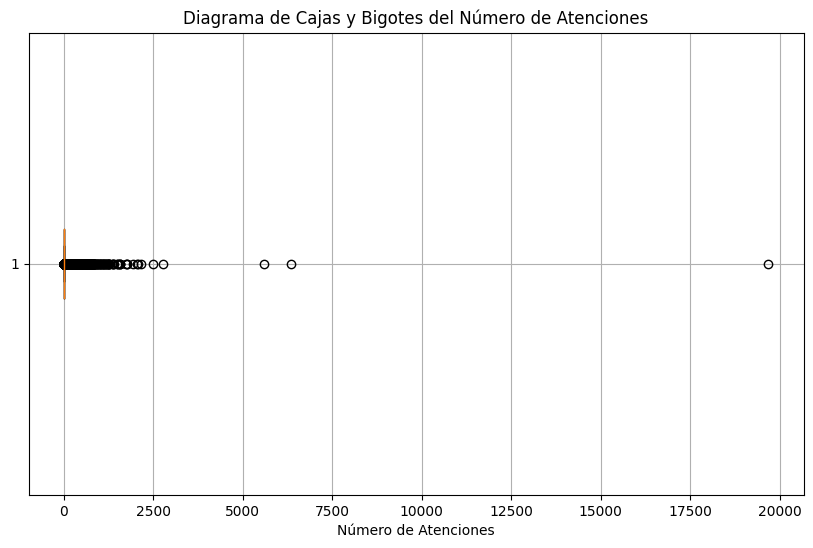

In [43]:
#Revisar que pasa con este valor atipico en un caja de bigotes

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.boxplot(df['Número de Atenciones'], vert=False)
plt.title('Diagrama de Cajas y Bigotes del Número de Atenciones')
plt.xlabel('Número de Atenciones')
plt.grid(True)
plt.show()

In [ ]:
#Se procede a eliminar el máximo dado que no se pueden hacer COLONOSCOPIA 19684 a  703 personas en un mes en un solo hospital

In [44]:
#Encontrar valor máximo
valor_maximo = df['Número de Atenciones'].max()
print(valor_maximo)

19684


In [45]:
#Eliminar valor máximo
df_sin_max = df[df['Número de Atenciones'] != valor_maximo]

In [47]:
#Reviso de nuevos los estadísticos
print(df_sin_max['Número de Atenciones'].describe())

count    695986.000000
mean          3.904343
std          21.698661
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        6349.000000
Name: Número de Atenciones, dtype: float64


In [49]:
#Reviso el núevo valor máximo
fila_max_atenciones = df_sin_max[df_sin_max['Número de Atenciones'] ==df_sin_max['Número de Atenciones'].max()]
print(fila_max_atenciones)

        Anno  Mes Departamento         Municipio              Administradora  \
497766  2023    2   27 - Chocó  27615 - Riosucio  EPSS37 - NUEVA EPS SA - CM   

                                           Prestador  \
497766  276150114004 - FUNDACIÓN SANTA SOFIA DE ASIS   

                   Procedimiento CUPS  Número de Atenciones  \
497766  452301 - COLONOSCOPIA TOTAL §                  6349   

        Número de Personas Atendidas  Conteo de Prestadores  
497766                           706                      1  


DE nuevo aparece un número de colonocopia que no se pueden hacer a ese número de personas, se elimina este valor máximo

In [52]:
#Encontrar nuevo valor máximo
valor_maximo = df_sin_max['Número de Atenciones'].max()
print(valor_maximo)


6349


In [53]:
df_sin_max = df_sin_max[df_sin_max['Número de Atenciones'] != valor_maximo]

In [54]:
#Reviso de nuevos los estadísticos
print(df_sin_max['Número de Atenciones'].describe())

count    695985.000000
mean          3.895226
std          20.322056
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        5594.000000
Name: Número de Atenciones, dtype: float64


In [55]:
#Reviso el núevo valor máximo
fila_max_atenciones = df_sin_max[df_sin_max['Número de Atenciones'] ==df_sin_max['Número de Atenciones'].max()]
print(fila_max_atenciones)

        Anno  Mes Departamento         Municipio              Administradora  \
560148  2023    5   27 - Chocó  27615 - Riosucio  EPSS37 - NUEVA EPS SA - CM   

                                           Prestador  \
560148  276150114004 - FUNDACIÓN SANTA SOFIA DE ASIS   

                   Procedimiento CUPS  Número de Atenciones  \
560148  452301 - COLONOSCOPIA TOTAL §                  5594   

        Número de Personas Atendidas  Conteo de Prestadores  
560148                           700                      1  


In [ ]:
#El mismo error de valor atipico, se procede a eliminar

In [56]:
#Encontrar nuevo valor máximo
valor_maximo = df_sin_max['Número de Atenciones'].max()
print(valor_maximo)


5594


In [57]:
df_sin_max = df_sin_max[df_sin_max['Número de Atenciones'] != valor_maximo]

In [58]:
#Reviso de nuevos los estadísticos
print(df_sin_max['Número de Atenciones'].describe())

count    695984.000000
mean          3.887194
std          19.185594
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        2772.000000
Name: Número de Atenciones, dtype: float64


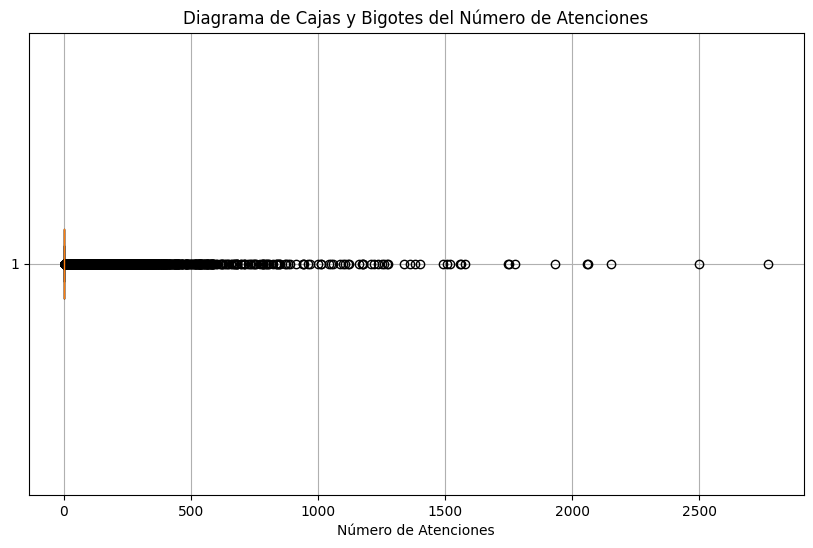

In [59]:
#Revisar que pasa con este valor atipico en un caja de bigotes

plt.figure(figsize=(10, 6))
plt.boxplot(df_sin_max['Número de Atenciones'], vert=False)
plt.title('Diagrama de Cajas y Bigotes del Número de Atenciones')
plt.xlabel('Número de Atenciones')
plt.grid(True)
plt.show()

In [62]:
#Dado que continuan apareciendo valores atipicos para un prestador, se hace la revisión particular para ese prestador

prestador_especifico = df_sin_max[df_sin_max['Prestador'] == "276150114004 - FUNDACIÓN SANTA SOFIA DE ASIS"]
prestador_especifico_ordenado = prestador_especifico.sort_values(by='Número de Atenciones', ascending=False)
print(prestador_especifico_ordenado)

        Anno  Mes          Departamento             Municipio  \
591126  2023    6            27 - Chocó      27615 - Riosucio   
530822  2023    4            27 - Chocó      27615 - Riosucio   
560146  2023    5            27 - Chocó      27615 - Riosucio   
520170  2023    4        05 - Antioquia         05837 - Turbo   
518427  2023    4        05 - Antioquia      05045 - Apartadó   
...      ...  ...                   ...                   ...   
588422  2023    6          23 - Córdoba      23855 - Valencia   
587896  2023    6          23 - Córdoba  23555 - Planeta Rica   
581564  2023    6     11 - Bogotá, D.C.  11001 - Bogotá, D.C.   
575806  2023    6        05 - Antioquia        05147 - Carepa   
601820  2023    6  76 - Valle del Cauca  76109 - Buenaventura   

                    Administradora  \
591126  EPSS37 - NUEVA EPS SA - CM   
530822          EPS037 - NUEVA EPS   
560146          EPS037 - NUEVA EPS   
520170  EPSS37 - NUEVA EPS SA - CM   
518427  EPSS37 - NUEVA EPS SA

In [63]:
df_sin_max = prestador_especifico[~prestador_especifico['Número de Atenciones'].isin([2772, 1260])]

In [64]:
#Reviso de nuevos los estadísticos
print(df_sin_max['Número de Atenciones'].describe())

count    100.000000
mean      33.350000
std       52.748953
min        4.000000
25%        8.000000
50%       16.000000
75%       28.000000
max      350.000000
Name: Número de Atenciones, dtype: float64


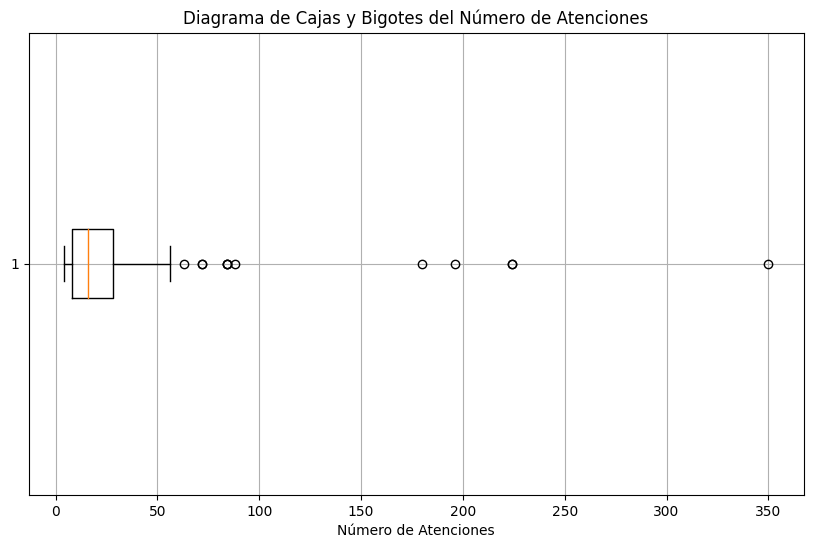

In [65]:
#Revisar que pasa con este valor atipico en un caja de bigotes

plt.figure(figsize=(10, 6))
plt.boxplot(df_sin_max['Número de Atenciones'], vert=False)
plt.title('Diagrama de Cajas y Bigotes del Número de Atenciones')
plt.xlabel('Número de Atenciones')
plt.grid(True)
plt.show()

In [66]:
#Reviso el núevo valor máximo
fila_max_atenciones = df_sin_max[df_sin_max['Número de Atenciones'] ==df_sin_max['Número de Atenciones'].max()]
print(fila_max_atenciones)

        Anno  Mes Departamento         Municipio      Administradora  \
560146  2023    5   27 - Chocó  27615 - Riosucio  EPS037 - NUEVA EPS   

                                           Prestador  \
560146  276150114004 - FUNDACIÓN SANTA SOFIA DE ASIS   

                   Procedimiento CUPS  Número de Atenciones  \
560146  452301 - COLONOSCOPIA TOTAL §                   350   

        Número de Personas Atendidas  Conteo de Prestadores  
560146                            44                      1  


In [120]:
#Dado que continuan apareciendo valores atipicos para un prestador, se hace la revisión particular para ese prestador

prestador_especifico = df_sin_max[df_sin_max['Prestador'] == "276150114004 - FUNDACIÓN SANTA SOFIA DE ASIS"]
prestador_especifico_ordenado = prestador_especifico.sort_values(by='Número de Atenciones', ascending=False)
columnas_a_mostrar = prestador_especifico_ordenado.drop(columns=['Departamento', 'Municipio', 'Administradora', 'Prestador','Conteo de Prestadores'])
print(columnas_a_mostrar.head(10))

        Anno  Mes            Procedimiento CUPS  Número de Atenciones  \
560146  2023    5  452301 - COLONOSCOPIA TOTAL                    350   
520170  2023    4  452301 - COLONOSCOPIA TOTAL                    224   
518427  2023    4  452301 - COLONOSCOPIA TOTAL                    224   
530755  2023    4  452301 - COLONOSCOPIA TOTAL                    196   
591122  2023    6  452301 - COLONOSCOPIA TOTAL                    180   
546671  2023    5  452301 - COLONOSCOPIA TOTAL                     88   
518414  2023    4  452301 - COLONOSCOPIA TOTAL                     84   
525865  2023    4  452301 - COLONOSCOPIA TOTAL                     84   
518870  2023    4  452301 - COLONOSCOPIA TOTAL                     84   
489078  2023    2  452301 - COLONOSCOPIA TOTAL                     72   

        Número de Personas Atendidas  
560146                            44  
520170                             8  
518427                             8  
530755                             7  
5

In [ ]:
# Se decide eliminar las 452301 - COLONOSCOPIA TOTAL en el 276150114004 - FUNDACIÓN SANTA SOFIA DE ASIS por las irregularidades presentadas

In [90]:
print(df_sin_max['Número de Atenciones'].describe())

count    100.000000
mean      33.350000
std       52.748953
min        4.000000
25%        8.000000
50%       16.000000
75%       28.000000
max      350.000000
Name: Número de Atenciones, dtype: float64


In [95]:
#Para eliminar las filas primero debo quitar un caracter especial

df_sin_max['Procedimiento CUPS'] = df_sin_max['Procedimiento CUPS'].str.replace('§', '', regex=False)


In [98]:
procedimientos_colonoscopia = df_sin_max[df_sin_max['Procedimiento CUPS'].str.startswith("452301 - COLONOSCOPIA TOTA")]
print(procedimientos_colonoscopia.head(1))

        Anno  Mes    Departamento         Municipio  \
487849  2023    2  05 - Antioquia  05045 - Apartadó   

                    Administradora  \
487849  EPSS37 - NUEVA EPS SA - CM   

                                           Prestador  \
487849  276150114004 - FUNDACIÓN SANTA SOFIA DE ASIS   

                  Procedimiento CUPS  Número de Atenciones  \
487849  452301 - COLONOSCOPIA TOTAL                     54   

        Número de Personas Atendidas  Conteo de Prestadores  
487849                             6                      1  


---------------------------------------------------
ELMINACIÓN DE DATOS ATÍPICPOS

In [119]:
# De Df original elimino 452301 - COLONOSCOPIA TOTAL
condicion = (df['Prestador'].str.strip() == "276150114004 - FUNDACIÓN SANTA SOFIA DE ASIS") & \
            (df['Procedimiento CUPS'].str.strip().str.startswith("452301 - COLONOSCOPIA TOTAL"))

# Filtrar las filas que cumplen con la condición
filas_a_eliminar = df[condicion]

# Imprimir la cantidad de filas a eliminar y las filas mismas
cantidad_filas_a_eliminar = len(filas_a_eliminar)
print(f"Cantidad de filas que serán eliminadas: {cantidad_filas_a_eliminar}")
print("Filas que serán eliminadas:")
print(filas_a_eliminar.head(1))
#Eliminar las filas
df_sin_fund = df.drop(filas_a_eliminar.index)
print("Tamaño df",df.shape)
print("Tamaño df_sin_fund",df_sin_fund.shape)
#Nuevos estadiscos
print(df_sin_fund['Número de Atenciones'].describe())

Cantidad de filas que serán eliminadas: 105
Filas que serán eliminadas:
        Anno  Mes    Departamento         Municipio  \
487849  2023    2  05 - Antioquia  05045 - Apartadó   

                    Administradora  \
487849  EPSS37 - NUEVA EPS SA - CM   

                                           Prestador  \
487849  276150114004 - FUNDACIÓN SANTA SOFIA DE ASIS   

                   Procedimiento CUPS  Número de Atenciones  \
487849  452301 - COLONOSCOPIA TOTAL §                    54   

        Número de Personas Atendidas  Conteo de Prestadores  
487849                             6                      1  
Tamaño df (695987, 10)
Tamaño df_sin_fund (695882, 10)
count    695882.000000
mean          3.877177
std          18.823968
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        2498.000000
Name: Número de Atenciones, dtype: float64


In [121]:
#Reviso el núevo valor máximo
fila_max_atenciones = df_sin_fund[df_sin_fund['Número de Atenciones'] ==df_sin_fund['Número de Atenciones'].max()]
print(fila_max_atenciones)

        Anno  Mes    Departamento         Municipio     Administradora  \
542783  2023    5  05 - Antioquia  05001 - Medellín  EPS010 - EPS SURA   

                                          Prestador  \
542783  050010904501 - ESTUDIOS ENDOSCOPICOS S.A.S.   

                                       Procedimiento CUPS  \
542783  441302 - ESOFAGOGASTRODUODENOSCOPIA [EGD] CON ...   

        Número de Atenciones  Número de Personas Atendidas  \
542783                  2498                          1248   

        Conteo de Prestadores  
542783                      1  


ANÁLITÍCA DESCRIPTIVA
REVISIÓN DE TENDENCIAS DE ATENCIONES EN EL TIEMPo

En este caso la cantidad de atenciones es proporcional al número de personas atentidas.
Vamos a ver como se comportan las atenciones año a año

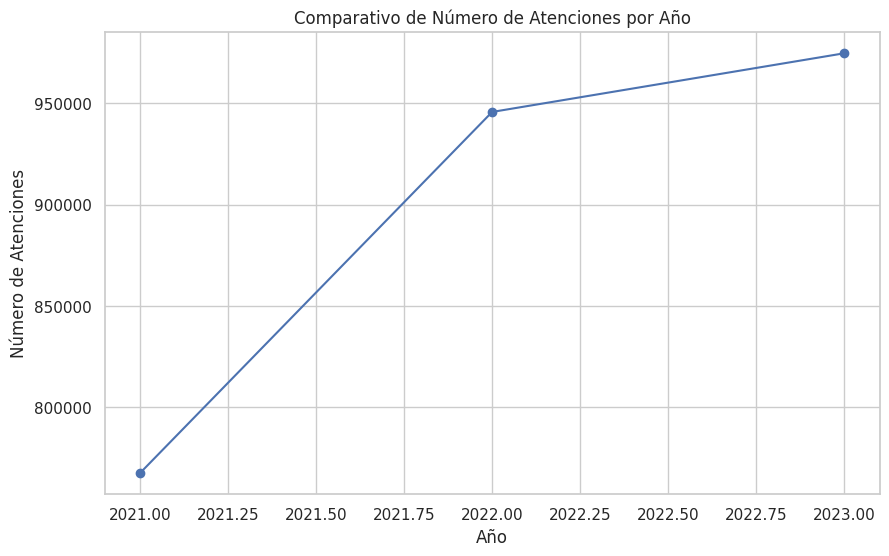

In [166]:
#Quitamos 2024 para comparar años completos
df_sin_2024 = df_sin_fund[df_sin_fund['Anno'] != 2024]
atenciones_por_anno = df_sin_2024.groupby('Anno')['Número de Atenciones'].sum()

plt.figure(figsize=(10, 6))
plt.plot(atenciones_por_anno.index, atenciones_por_anno.values, marker='o', linestyle='-', color='b')
plt.title('Comparativo de Número de Atenciones por Año')
plt.xlabel('Año')
plt.ylabel('Número de Atenciones')
plt.grid(True)
plt.show()

In [128]:
# Agrupar
atenciones_por_anno = df_sin_2024.groupby('Anno')['Número de Atenciones'].sum().reset_index()

# % Crecimiento
atenciones_por_anno['% Crecimiento'] = atenciones_por_anno['Número de Atenciones'].pct_change() * 100

# Llenar los valores nulos (por ejemplo, el primer año no tiene crecimiento anterior)
atenciones_por_anno['% Crecimiento'] = atenciones_por_anno['% Crecimiento'].fillna(0)

# Mostrar la tabla resultante
print(atenciones_por_anno)

   Anno  Número de Atenciones  % Crecimiento
0  2021                767536       0.000000
1  2022                945645      23.205296
2  2023                974581       3.059922


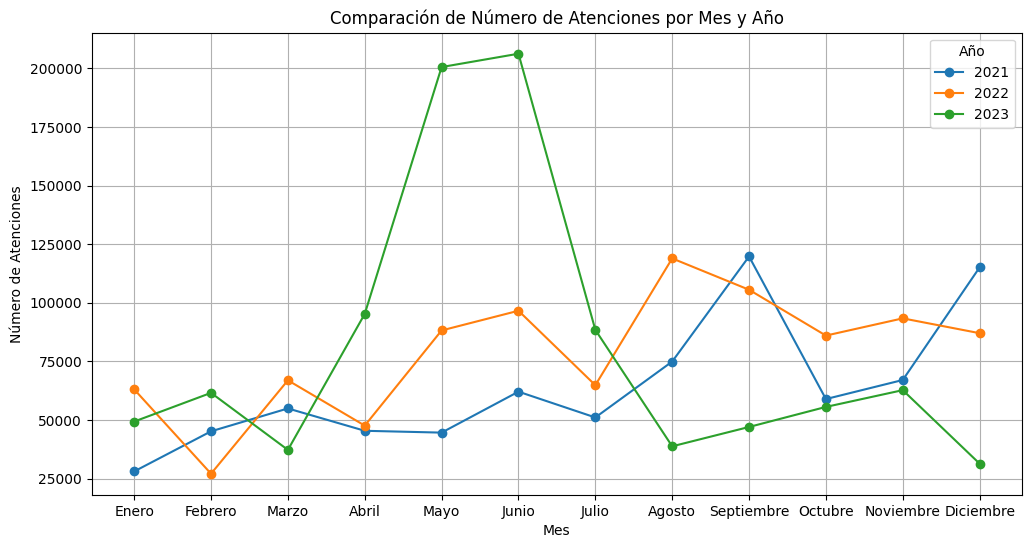

In [130]:
# Pivotar el DataFrame para tener los meses en las columnas y los años como líneas
df_pivot = df_sin_2024.pivot_table(index='Mes', columns='Anno', values='Número de Atenciones', aggfunc='sum')

# Crear el gráfico
plt.figure(figsize=(12, 6))
for year in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[year], marker='o', label=year)

plt.title('ATENCIONES POR AÑO')
plt.xlabel('Mes')
plt.ylabel('Número de Atenciones')
plt.xticks(ticks=range(1, 13), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                                       'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
plt.legend(title='Año')
plt.grid(True)
plt.show()

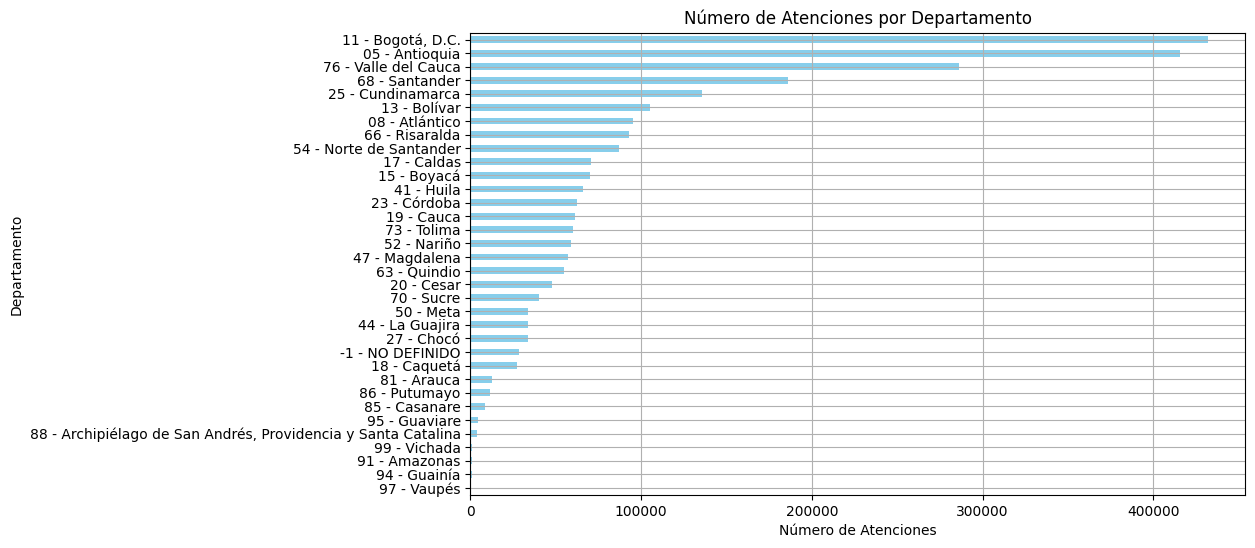

In [131]:
#Atenciones por departamento

atenciones_por_departamento = df_sin_2024.groupby('Departamento')['Número de Atenciones'].sum().sort_values()

# Gráfico
plt.figure(figsize=(10, 6))
atenciones_por_departamento.plot(kind='barh', color='skyblue')
plt.title('Número de Atenciones por Departamento')
plt.xlabel('Número de Atenciones')
plt.ylabel('Departamento')
plt.grid(True)

plt.show()

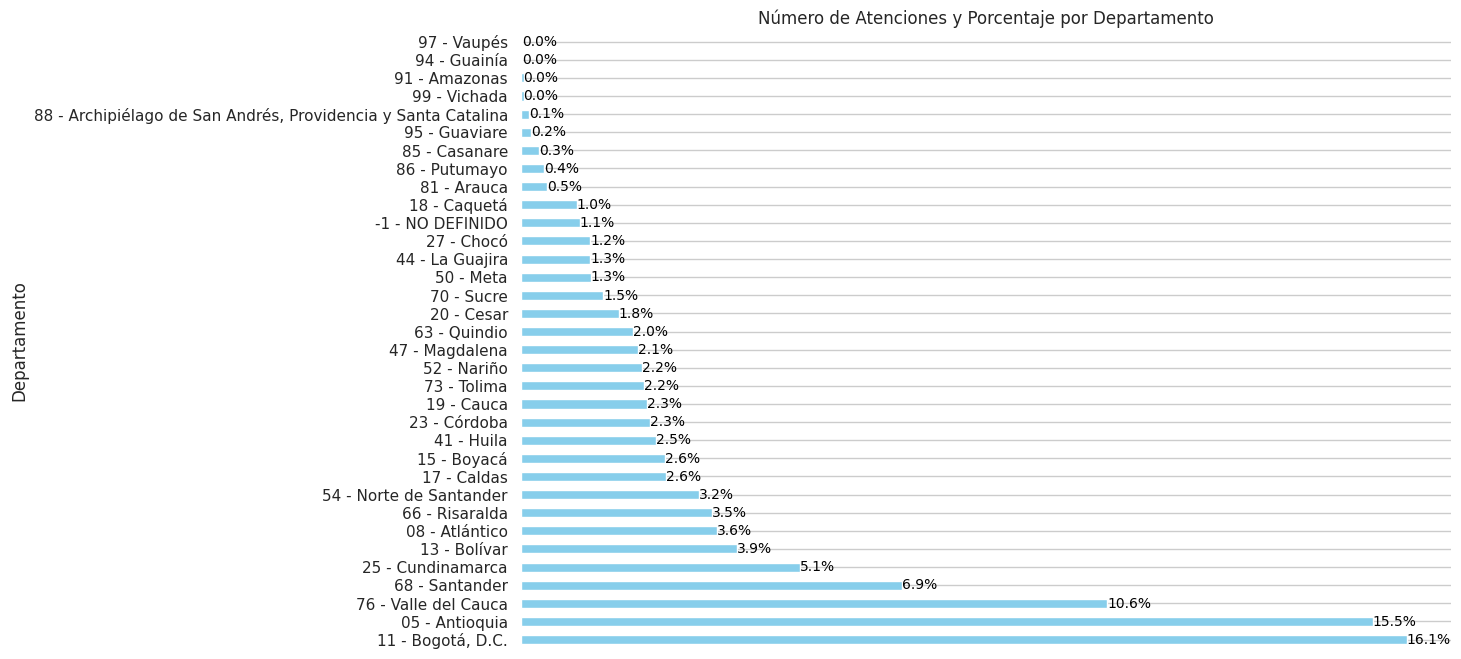

In [142]:
#Atenciones por departamento con porcentaje


porcentaje_atenciones = (atenciones_por_departamento / atenciones_por_departamento.sum()) * 100

# Ordenar

atenciones_por_departamento = atenciones_por_departamento.sort_values(ascending=False)
porcentaje_atenciones = (atenciones_por_departamento / atenciones_por_departamento.sum()) * 100

# Barras horizontales
plt.figure(figsize=(12, 8))
ax = atenciones_por_departamento.plot(kind='barh', color='skyblue')
plt.title('Número de Atenciones y Porcentaje por Departamento')
plt.xlabel('Número de Atenciones')
plt.ylabel('Departamento')

# Líneas de fondo
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Quitar números de los ejes
ax.xaxis.set_visible(False)

# Porcentajes en las  barras
for i, (value, percent) in enumerate(zip(atenciones_por_departamento, porcentaje_atenciones)):
    ax.text(value, i, f'{percent:.1f}%', va='center', ha='left', fontsize=10, color='black')

plt.show()



In [ ]:
Uso de seaborn

<ipython-input-143-5662a8a41347>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=atenciones_por_departamento, y=atenciones_por_departamento.index, palette="viridis")


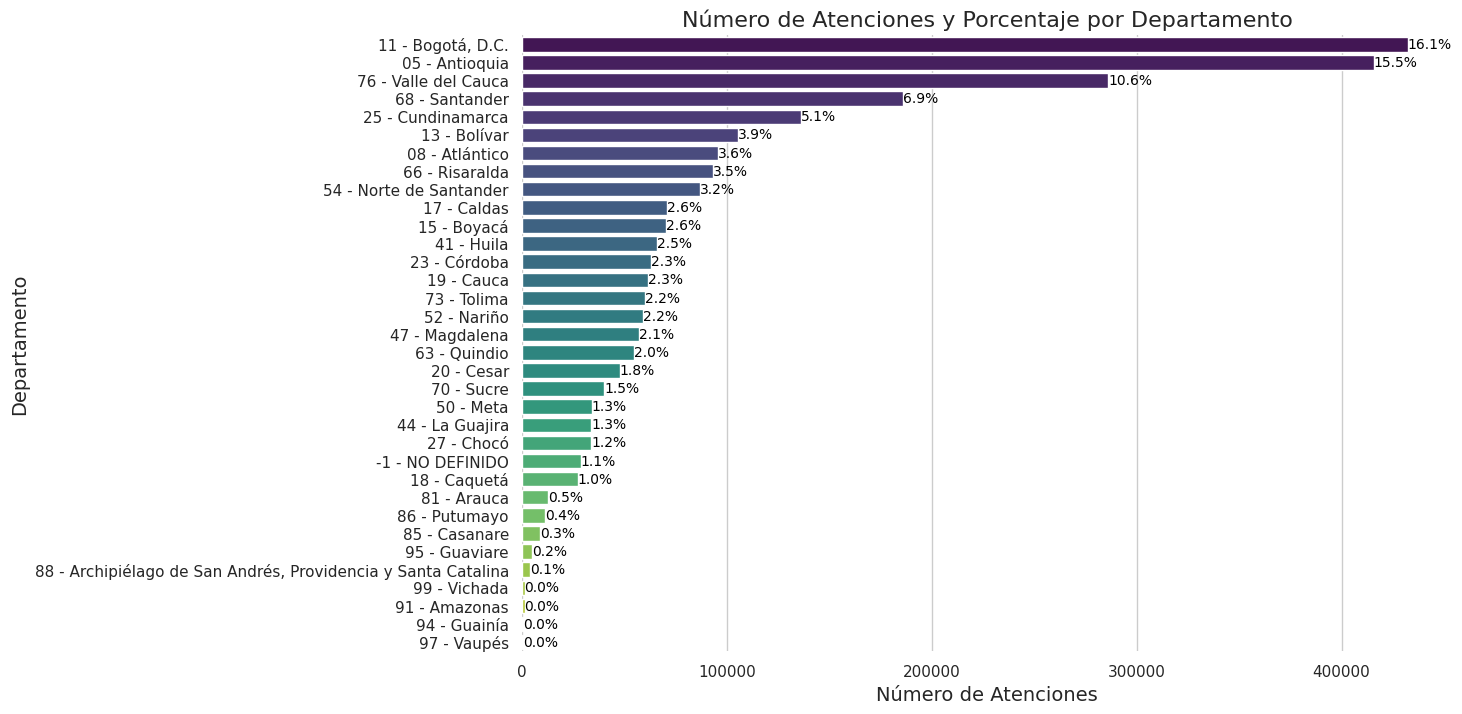

In [143]:
import seaborn as sns

sns.set(style="whitegrid")

# Barras horizontales
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=atenciones_por_departamento, y=atenciones_por_departamento.index, palette="viridis")

# Porcentakes en lasbarras
for i, (value, percent) in enumerate(zip(atenciones_por_departamento, porcentaje_atenciones)):
    ax.text(value, i, f'{percent:.1f}%', va='center', ha='left', fontsize=10, color='black')

# Títulos y etiquetas
plt.title('Número de Atenciones y Porcentaje por Departamento', fontsize=16)
plt.xlabel('Número de Atenciones', fontsize=14)
plt.ylabel('Departamento', fontsize=14)

# Quitar las líneas de los ejes para un aspecto más limpio
sns.despine(left=True, bottom=True)

plt.show()

PRODECIMIENTOS MÁS REALIZADOS

Procedimientos más realizados en el país (de acuerdo a la base filtrada de procedimientos)

In [165]:

atenciones_por_procedimiento = df_sin_2024.groupby('Procedimiento CUPS')['Número de Atenciones'].sum().reset_index()

# % de atenciones
total_atenciones = atenciones_por_procedimiento['Número de Atenciones'].sum()
atenciones_por_procedimiento['Porcentaje de Atenciones'] = (
    atenciones_por_procedimiento['Número de Atenciones'] / total_atenciones * 100
)

# Ordenar
atenciones_por_procedimiento = atenciones_por_procedimiento.sort_values(by='Número de Atenciones', ascending=False)

# Top 10
top_10_procedimientos = atenciones_por_procedimiento.head(10).copy()

# Formatear
top_10_procedimientos.loc[:, 'Número de Atenciones'] = top_10_procedimientos['Número de Atenciones'].apply(lambda x: f'{x:,.0f}')
top_10_procedimientos.loc[:, 'Porcentaje de Atenciones'] = top_10_procedimientos['Porcentaje de Atenciones'].apply(lambda x: f'{x:.2f}%')

# Estilo tabla :  Pandas Styler
def highlight_max(data, color='lightblue'):
    attr = f'background-color: {color}'
    if data.ndim == 1:  # series
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # dataframe
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

# Estilo tabla: pandas Styler
styled_table = (top_10_procedimientos.style
                .set_caption('Procedimientos más realizados')
                .set_table_styles([
                    {'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
                    {'selector': 'td', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
                    {'selector': 'th.col0', 'props': [('width', '40em'), ('text-align', 'left')]},
                    {'selector': 'td.col0', 'props': [('text-align', 'left')]},
                    {'selector': 'th.col1', 'props': [('width', '12em')]},
                    {'selector': 'th.col2', 'props': [('width', '12em')]}
                ])
                .set_properties(**{
                    'border-color': 'black',
                    'border-width': '1px',
                    'border-style': 'solid',
                })
                .apply(highlight_max, subset=['Número de Atenciones', 'Porcentaje de Atenciones'])
                .hide(axis='index'))

# Mostrar tabla
styled_table





Procedimiento CUPS,Número de Atenciones,Porcentaje de Atenciones
441302 - ESOFAGOGASTRODUODENOSCOPIA [EGD] CON O SIN BIOPSIA,"983,328",36.59%
452301 - COLONOSCOPIA TOTAL §,"629,930",23.44%
573201 - CISTOSCOPIA TRANSURETRAL,"288,273",10.73%
452305 - COLONOSCOPIA TOTAL CON O SIN BIOPSIA,"109,499",4.07%
378501 - REVISION (REPROGRAMACION) DE MARCAPASOS,"79,152",2.94%
"360101 - ANGIOPLASTIA CORONARIA TRANSLUMINAL PERCUTANEA, UNO O DOS VASOS","44,028",1.64%
592401 - LITOTRICIA (FRAGMENTACIÓN) INTRACORPÓREA DE CÁLCULOS EN VÍA URINARIA,"37,339",1.39%
378503 - REVISION (REPROGRAMACION) DE CARDIOVERSOR (DESFIBRILADOR),"25,436",0.95%
511000 - COLANGIO-PANCREATOGRAFIA RETROGRADA ENDOSCÓPICA (CPRE) SOD,"25,041",0.93%
431002 - GASTROSTOMÍA VÍA PERCUTÁNEA (ENDOSCÓPICA),"24,504",0.91%


In [162]:
#Atenciones por prestador
atenciones_por_prestador = df_sin_2024.groupby('Prestador')['Número de Atenciones'].sum().reset_index()

# Agrupar
atenciones_por_prestador = df.groupby('Prestador')['Número de Atenciones'].sum().reset_index()

# % Atenciones por pestador
total_atenciones = atenciones_por_prestador['Número de Atenciones'].sum()
atenciones_por_prestador['Porcentaje de Atenciones'] = (
    atenciones_por_prestador['Número de Atenciones'] / total_atenciones * 100
)

# Ordenar de mayor a menor
atenciones_por_prestador = atenciones_por_prestador.sort_values(by='Número de Atenciones', ascending=False)

# Top 10
top_10_prestadores = atenciones_por_prestador.head(10).copy()

# Formatear
top_10_prestadores.loc[:, 'Número de Atenciones'] = top_10_prestadores['Número de Atenciones'].apply(lambda x: f'{x:,.0f}')
top_10_prestadores.loc[:, 'Porcentaje de Atenciones'] = top_10_prestadores['Porcentaje de Atenciones'].apply(lambda x: f'{x:.2f}%')

# Tabla: Pandas Styler
def highlight_max(data, color='lightblue'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = f'background-color: {color}'
    if data.ndim == 1:  # series
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # dataframe
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

# estilo : Pandas Styler
styled_table = (top_10_prestadores.style
                .set_caption('Prestadores con más atenciones')
                .set_table_styles([
                    {'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
                    {'selector': 'td', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
                    {'selector': 'th.col0', 'props': [('width', '40em'), ('text-align', 'left')]},
                    {'selector': 'td.col0', 'props': [('text-align', 'left')]},
                    {'selector': 'th.col1', 'props': [('width', '12em')]},
                    {'selector': 'th.col2', 'props': [('width', '12em')]}
                ])
                .set_properties(**{
                    'border-color': 'black',
                    'border-width': '1px',
                    'border-style': 'solid',
                })
                .apply(highlight_max, subset=['Número de Atenciones', 'Porcentaje de Atenciones'])
                .hide(axis='index'))

# Mostrar Tabla
styled_table

Prestador,Número de Atenciones,Porcentaje de Atenciones
050010951501 - INTERGASTRO S.A.,"59,757",2.18%
680010341801 - LOS COMUNEROS HOSPITAL UNIVERSITARIO DE BUCARAMANGA,"57,246",2.09%
050010904501 - ESTUDIOS ENDOSCOPICOS S.A.S.,"53,733",1.96%
760010287001 - FUNDACION VALLE DEL LILI,"46,769",1.71%
170010182801 - UNION DE CIRUJANOS S.A.S.,"39,357",1.44%
276150114004 - FUNDACIÓN SANTA SOFIA DE ASIS,"38,994",1.42%
682760166601 - FUNDACION OFTALMOLOGICA DE SDER FOSCAL,"31,292",1.14%
660010158701 - Clinica San Rafael sede CUBA,"28,583",1.04%
110010577601 - CENTRO MEDICO ENDOCENTRO LTDA,"24,487",0.89%
130010033001 - CENTROMEDICO CRECER LTDA,"23,847",0.87%


CONCLUSIONES :

Para algunas insituciones se encuenta una serie de regristo de número de procedimientos que si se compara con los pacientes atendidos o con la capacidad de realización de procemientos mensual, requieren una revisión dado que no coinciden con la realidad.

Para el año del 2023 hay un número mayor de registros debido a la mayor cantidad de registros hecha en los meses de mayo y junio que valdría le pena revisar en detalle.

La ciudad con más registros es Bogotá seguida por antioquia.

En términosde procedimientos el procedimiento más realizado en el país es ESOFAGOGASTRODUODENOSCOPIA CON O SIN BIOPSIA

En términos de prestador el que más atenciones tiene es INTERGASTRO S.A

